# Network diagrams for NL/GQL

In [53]:
import matplotlib.pyplot as plt
import matplotlib as mat
import numpy as np
import networkx as nwkx
import collections

#### Define modes function to get all modes in an nx-ny grid

In [2]:
def modes(nx,ny):
        
    i = 0
    x = []
    for p in np.arange(-nx,nx+1):
        for q in np.arange(-ny,ny+1):

            x.append((p,q))
            i += 1
    
    return x

In [3]:
print(modes(1,1))

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]


#### Define triads function to get all feasible triads in an nx-ny grid

In [4]:
def triads(nx,ny):
        
    x = []
    for p in modes(nx,ny):
        for q in modes(nx,ny):
                        
            k = (p[0]+q[0],p[1]+q[1])
            
            if not(k[0]==0 and k[1]==0) and not(p[0]==0 and p[1]==0) and not(q[0]==0 and q[1]==0): # non-zeros
          
                if np.abs(k[0])<=nx and np.abs(k[1])<=ny: # remove out of bounds
                   
                    if p != q and q != k: # no self-interactions
                    
                        x.append((p,q,k)) # pxq -> k
    
    return x

In [5]:
print(len(triads(1,1)))

24


In [6]:
print(triads(1,1))

[((-1, -1), (0, 1), (-1, 0)), ((-1, -1), (1, 0), (0, -1)), ((-1, 0), (0, -1), (-1, -1)), ((-1, 0), (0, 1), (-1, 1)), ((-1, 0), (1, -1), (0, -1)), ((-1, 0), (1, 1), (0, 1)), ((-1, 1), (0, -1), (-1, 0)), ((-1, 1), (1, 0), (0, 1)), ((0, -1), (-1, 0), (-1, -1)), ((0, -1), (-1, 1), (-1, 0)), ((0, -1), (1, 0), (1, -1)), ((0, -1), (1, 1), (1, 0)), ((0, 1), (-1, -1), (-1, 0)), ((0, 1), (-1, 0), (-1, 1)), ((0, 1), (1, -1), (1, 0)), ((0, 1), (1, 0), (1, 1)), ((1, -1), (-1, 0), (0, -1)), ((1, -1), (0, 1), (1, 0)), ((1, 0), (-1, -1), (0, -1)), ((1, 0), (-1, 1), (0, 1)), ((1, 0), (0, -1), (1, -1)), ((1, 0), (0, 1), (1, 1)), ((1, 1), (-1, 0), (0, 1)), ((1, 1), (0, -1), (1, 0))]


In [7]:
((0,1),(0,-1),(0,0)) in triads(1,1)

False

In [8]:
m = modes(1,1)[3]

print("Looking for mode: ", m)

for t in triads(1,1):
    if(m in t):
        print("Present in triad:", t)

Looking for mode:  (0, -1)
Present in triad: ((-1, -1), (1, 0), (0, -1))
Present in triad: ((-1, 0), (0, -1), (-1, -1))
Present in triad: ((-1, 0), (1, -1), (0, -1))
Present in triad: ((-1, 1), (0, -1), (-1, 0))
Present in triad: ((0, -1), (-1, 0), (-1, -1))
Present in triad: ((0, -1), (-1, 1), (-1, 0))
Present in triad: ((0, -1), (1, 0), (1, -1))
Present in triad: ((0, -1), (1, 1), (1, 0))
Present in triad: ((1, -1), (-1, 0), (0, -1))
Present in triad: ((1, 0), (-1, -1), (0, -1))
Present in triad: ((1, 0), (0, -1), (1, -1))
Present in triad: ((1, 1), (0, -1), (1, 0))


#### Edges between modes and triads based on adjacency

In [9]:
def edges(nx,ny,A):
        
    m = modes(nx,ny)
    
    e = []
    for t in triads(nx,ny):
        
        i = m.index(t[0])
        j = m.index(t[1])
        
        if(A[i,j] > 0.0):
            e.append((t[0],t))
            e.append((t[1],t))
            e.append((t[2],t))
    
    
    return e

In [10]:
A = np.zeros((9,9))
A[2,3] = 1.0
e = edges(1,1,A)

In [11]:
print(e)

[((-1, 1), ((-1, 1), (0, -1), (-1, 0))), ((0, -1), ((-1, 1), (0, -1), (-1, 0))), ((-1, 0), ((-1, 1), (0, -1), (-1, 0)))]


#### Graph based on edge list between modes and triads

In [12]:
def graph(nx,ny,A):

    m = modes(nx,ny)
    m.remove((0,0))

    t = triads(nx,ny)
    e = edges(nx,ny,A)

    bpg=nwkx.Graph()

    bpg.add_nodes_from(m,bipartite=0)
    bpg.add_nodes_from(t,bipartite=1)
    bpg.add_edges_from(e)

    dl = list(nwkx.connected_components(bpg))[1:]
    for d in dl:
        for n in d:
            bpg.remove_node(n)

    return bpg

#### Node positions in graph drawing

In [13]:
def nodepos(G):
    
    l, r = nwkx.bipartite.sets(G)
    pos = {}

    pos.update((node, (0, index)) for index, node in enumerate(l))
    pos.update((node, (1, index)) for index, node in enumerate(r))

    return pos

#### Adjacency matrix labels

In [14]:
def ax_adj(ax,nx,ny):
    
    l = []
    for m in modes(nx,ny):
        l.append(str(m))

    for a in ax:
        a.set_xticks(np.arange(0,(2*nx+1)*(2*ny+1),1))
        a.set_yticks(np.arange(0,(2*nx+1)*(2*ny+1),1))
        a.set_xticklabels(l,fontsize=14)
        a.set_yticklabels(l,fontsize=14)

### Draw fully connected bipartite network

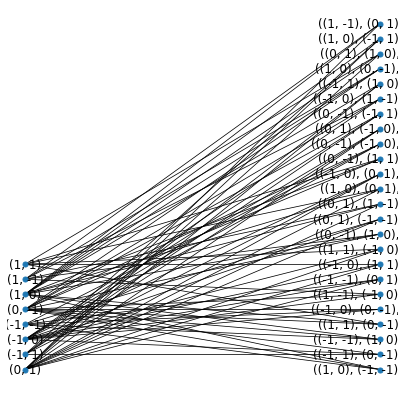

In [15]:
A = np.ones((9,9))
G = graph(1,1,A)
pos = nodepos(G)

fig,ax = plt.subplots(figsize=(7,7))

nwkx.draw(G,pos=pos,node_size=25,with_labels=True,width=0.75)

plt.show()

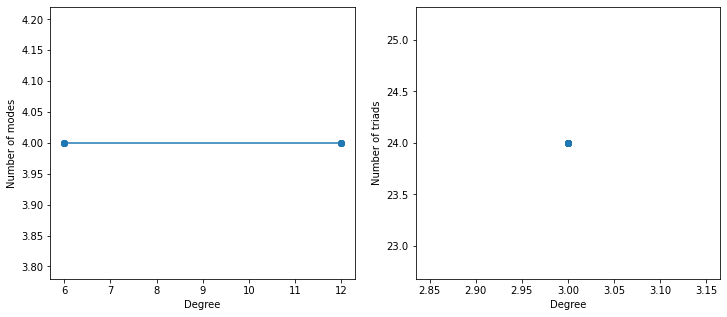

In [16]:
f,g = nwkx.bipartite.sets(G)

fig,ax = plt.subplots(1,2,figsize=(12,5))

mdegs = G.degree(f) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[0].plot(mvals,mhist,'o-')
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of modes')


mdegs = G.degree(g) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[1].plot(mvals,mhist,'o-')
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Number of triads')


plt.show()

### Draw bipartite network based on  adjacency for 2x2 grid

In [17]:
dn = "data/"

#### NL

In [48]:
fn = dn+"adjacency_nl_2x2.npz"
nl = np.load(fn,allow_pickle=True) 

nx = 1
ny = 1

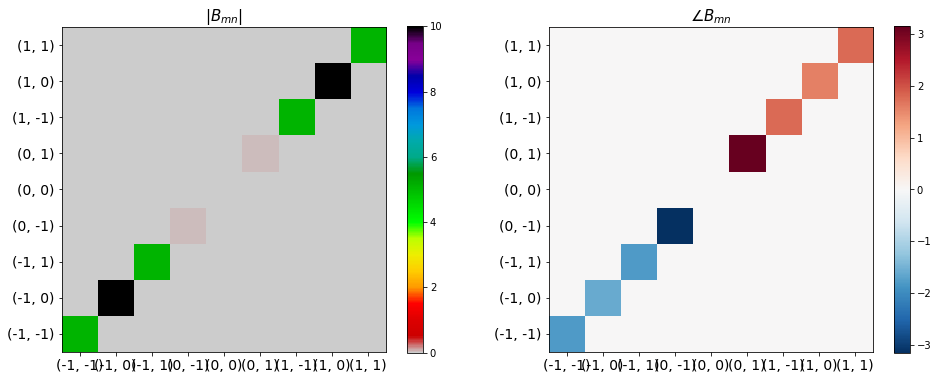

In [49]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

im = ax[0].imshow(np.abs(nl['A']),cmap="nipy_spectral_r",origin="lower",interpolation="none")
fig.colorbar(im,ax=ax[0])
ax[0].set_title(r'$|B_{mn}|$',fontsize=15)

im = ax[1].imshow(np.angle(nl['A']),cmap="RdBu_r",origin="lower",interpolation="none")
fig.colorbar(im,ax=ax[1])
ax[1].set_title(r'$\angle B_{mn}$',fontsize=15)

ax_adj(ax,nx,ny)

plt.show()

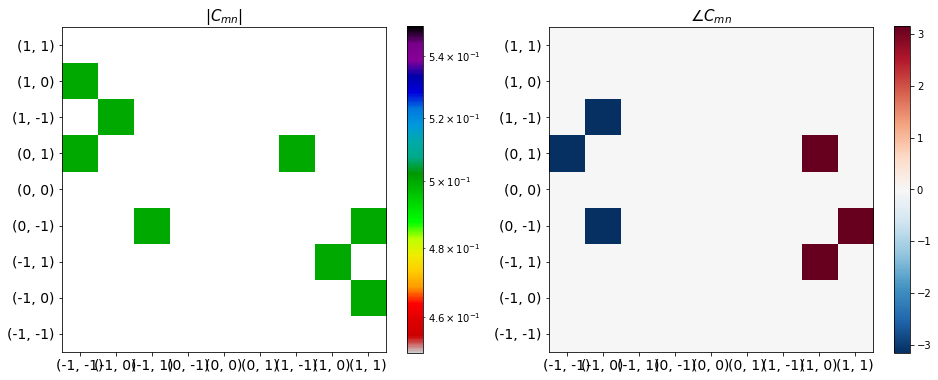

In [54]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

# abs
im = ax[0].imshow(np.abs(nl['C']),cmap="nipy_spectral_r",origin="lower",interpolation="none",norm=mat.colors.LogNorm())

ax[0].set_title(r'$|C_{mn}|$',fontsize=15)
fig.colorbar(im,ax=ax[0])

# angle
im = ax[1].imshow(np.angle(nl['C']),cmap="RdBu_r",origin="lower",interpolation="none")

ax[1].set_title(r'$\angle C_{mn}$',fontsize=15)
fig.colorbar(im,ax=ax[1])

ax_adj(ax,nx,ny)

plt.show()

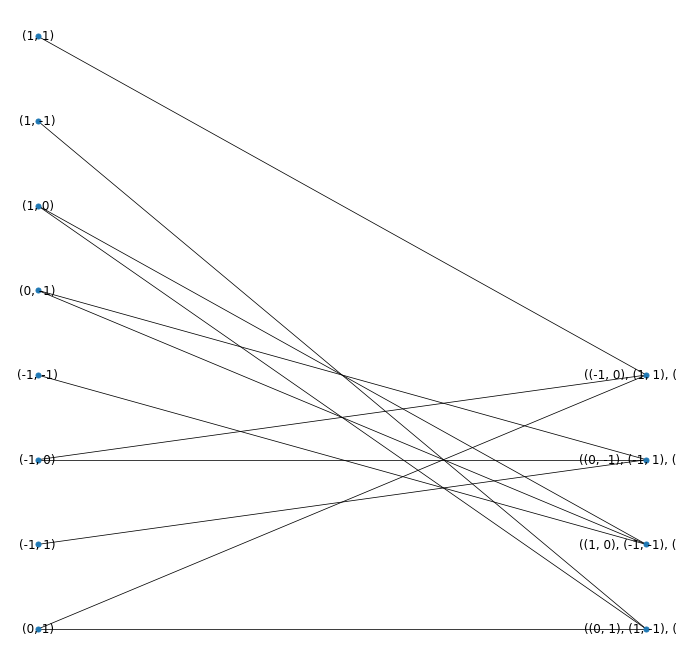

In [56]:
A = nl['C']

G = graph(1,1,A)
pos = nodepos(G)

fig,ax = plt.subplots(figsize=(12,12))

nwkx.draw(G,pos=pos,node_size=25,with_labels=True,width=0.75)

plt.show()

#### QL

In [22]:
fn = dn+"adjacency_ql_2x2.npz"
ql = np.load(fn,allow_pickle=True) 

nx = 1
ny = 1

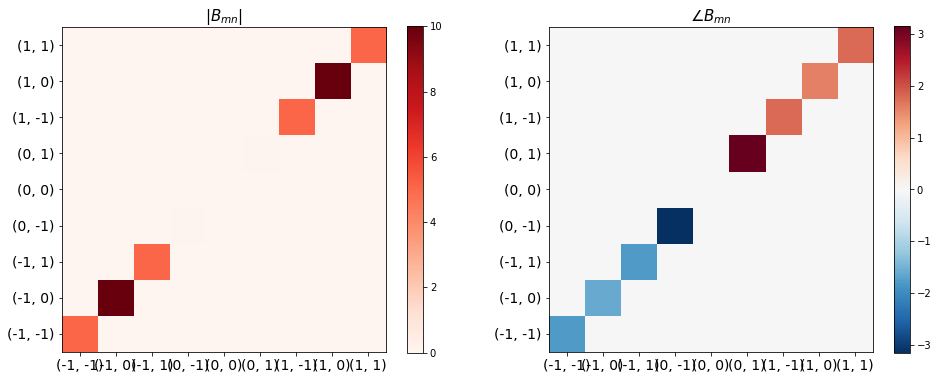

In [23]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

im = ax[0].imshow(np.abs(ql['A']),cmap="Reds",origin="lower",interpolation="none")
fig.colorbar(im,ax=ax[0])
ax[0].set_title(r'$|B_{mn}|$',fontsize=15)

im = ax[1].imshow(np.angle(ql['A']),cmap="RdBu_r",origin="lower",interpolation="none")
fig.colorbar(im,ax=ax[1])
ax[1].set_title(r'$\angle B_{mn}$',fontsize=15)

ax_adj(ax,nx,ny)

plt.show()

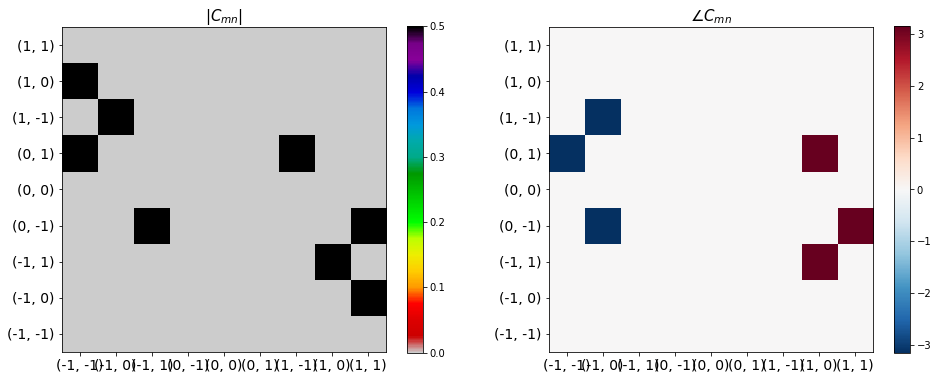

In [24]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

# abs
im = ax[0].imshow(np.abs(ql['C']),cmap="nipy_spectral_r",origin="lower",interpolation="none")

ax[0].set_title(r'$|C_{mn}|$',fontsize=15)
fig.colorbar(im,ax=ax[0])

# angle
im = ax[1].imshow(np.angle(ql['C']),cmap="RdBu_r",origin="lower",interpolation="none")

ax[1].set_title(r'$\angle C_{mn}$',fontsize=15)
fig.colorbar(im,ax=ax[1])

ax_adj(ax,nx,ny)

plt.show()

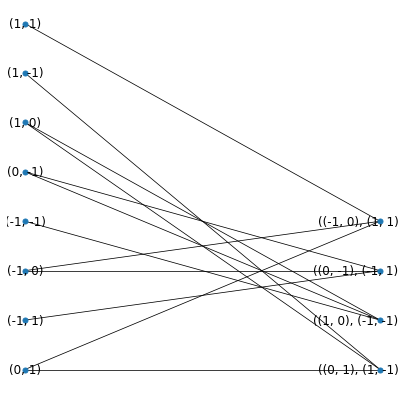

In [25]:
A = ql['C']
G = graph(1,1,A)
pos = nodepos(G)

fig,ax = plt.subplots(figsize=(7,7))

nwkx.draw(G,pos=pos,node_size=25,with_labels=True,width=0.75)

plt.show()

### Draw bipartite network based on  adjacency for 3x3 grid

In [26]:
fn = dn+"adjacency_nl_3x3.npz"
nl = np.load(fn,allow_pickle=True) 

nx = 2
ny = 2

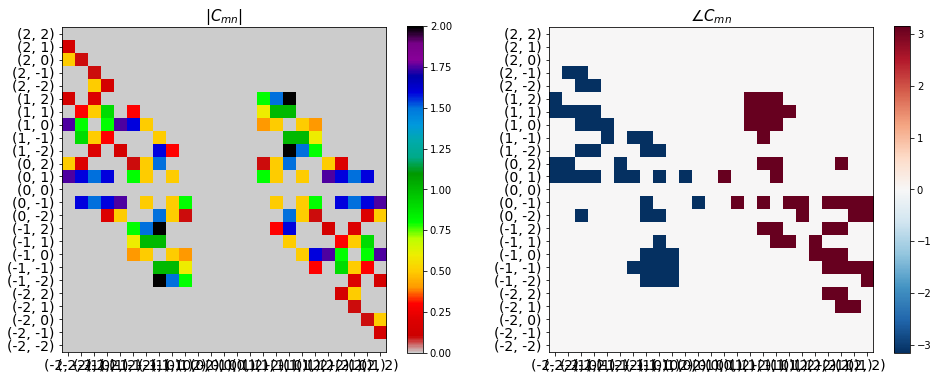

In [27]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

# abs
im = ax[0].imshow(np.abs(nl['C']),cmap="nipy_spectral_r",origin="lower",interpolation="none")

ax[0].set_title(r'$|C_{mn}|$',fontsize=15)
fig.colorbar(im,ax=ax[0])

# angle
im = ax[1].imshow(np.angle(nl['C']),cmap="RdBu_r",origin="lower",interpolation="none")

ax[1].set_title(r'$\angle C_{mn}$',fontsize=15)
fig.colorbar(im,ax=ax[1])

ax_adj(ax,nx,ny)

plt.show()

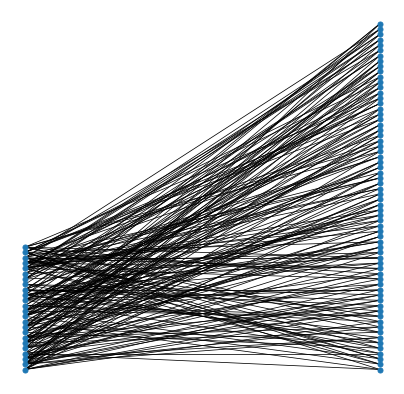

In [28]:
A = nl['C'] # test a fully connected graph

G = graph(2,2,A)
pos = nodepos(G)

fig,ax = plt.subplots(figsize=(7,7))

nwkx.draw(G,pos=pos,node_size=25,with_labels=False,width=0.75)

plt.show()

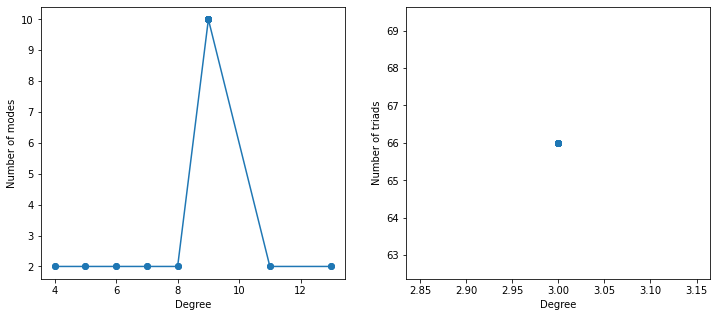

In [29]:
f,g = nwkx.bipartite.sets(G)

fig,ax = plt.subplots(1,2,figsize=(12,5))

mdegs = G.degree(f) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[0].plot(mvals,mhist,'o-')
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of modes')


mdegs = G.degree(g) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[1].plot(mvals,mhist,'o-')
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Number of triads')


plt.show()

In [30]:
fn = dn+"adjacency_ql_3x3.npz"
ql = np.load(fn,allow_pickle=True) 

nx = 2
ny = 2

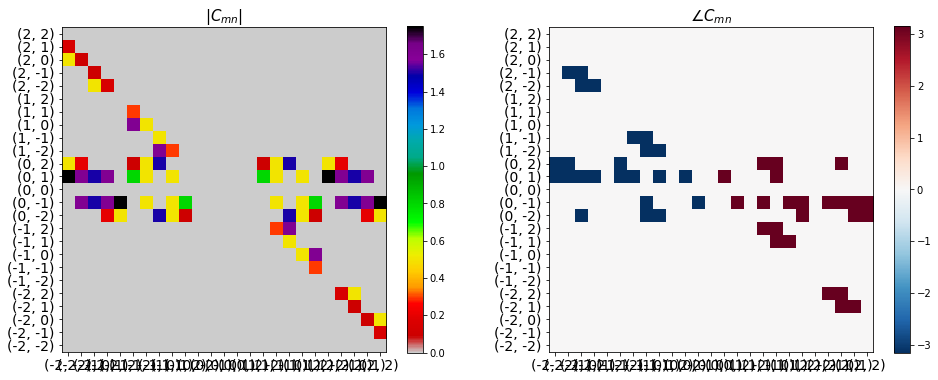

In [31]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

# abs
im = ax[0].imshow(np.abs(ql['C']),cmap="nipy_spectral_r",origin="lower",interpolation="none")

ax[0].set_title(r'$|C_{mn}|$',fontsize=15)
fig.colorbar(im,ax=ax[0])

# angle
im = ax[1].imshow(np.angle(ql['C']),cmap="RdBu_r",origin="lower",interpolation="none")

ax[1].set_title(r'$\angle C_{mn}$',fontsize=15)
fig.colorbar(im,ax=ax[1])

ax_adj(ax,nx,ny)

plt.show()

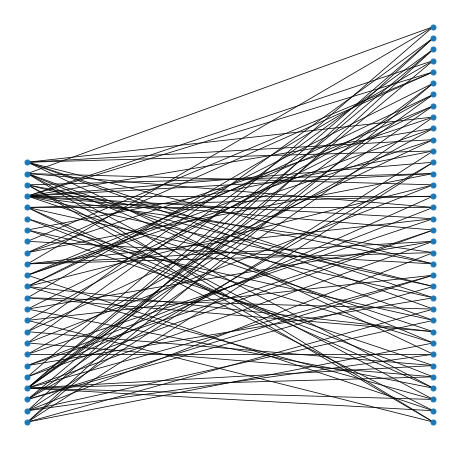

In [32]:
A = ql['C'] # test a fully connected graph

G = graph(2,2,A)
pos = nodepos(G)

fig,ax = plt.subplots(figsize=(8,8))

nwkx.draw(G,pos=pos,node_size=25,with_labels=False,width=0.75)

plt.show()

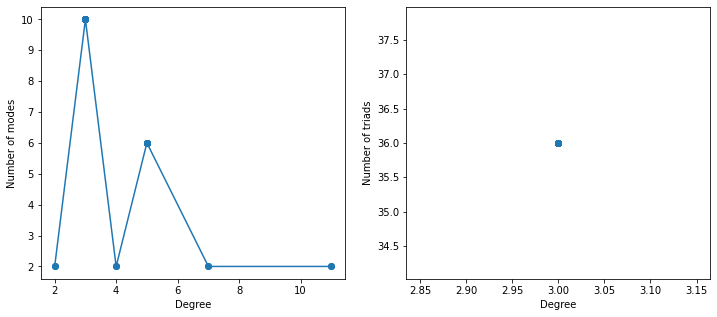

In [33]:
f,g = nwkx.bipartite.sets(G)

fig,ax = plt.subplots(1,2,figsize=(12,5))

mdegs = G.degree(f) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[0].plot(mvals,mhist,'o-')
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of modes')


mdegs = G.degree(g) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[1].plot(mvals,mhist,'o-')
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Number of triads')


plt.show()

In [57]:
fn = dn+"adjacency_gql1_3x3.npz"
gql = np.load(fn,allow_pickle=True) 

nx = 2
ny = 2

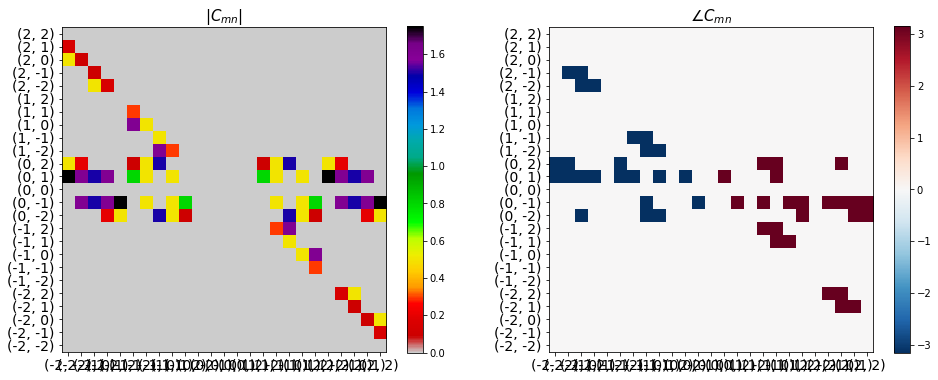

In [58]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

# abs
im = ax[0].imshow(np.abs(gql['C']),cmap="nipy_spectral_r",origin="lower",interpolation="none")

ax[0].set_title(r'$|C_{mn}|$',fontsize=15)
fig.colorbar(im,ax=ax[0])

# angle
im = ax[1].imshow(np.angle(gql['C']),cmap="RdBu_r",origin="lower",interpolation="none")

ax[1].set_title(r'$\angle C_{mn}$',fontsize=15)
fig.colorbar(im,ax=ax[1])

ax_adj(ax,nx,ny)

plt.show()

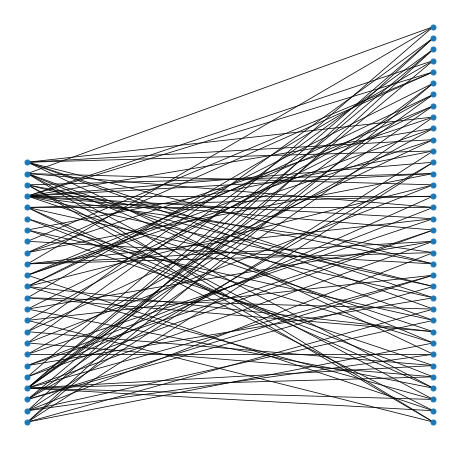

In [59]:
A = gql['C'] # test a fully connected graph

G = graph(2,2,A)
pos = nodepos(G)

fig,ax = plt.subplots(figsize=(8,8))

nwkx.draw(G,pos=pos,node_size=25,with_labels=False,width=0.75)

plt.show()

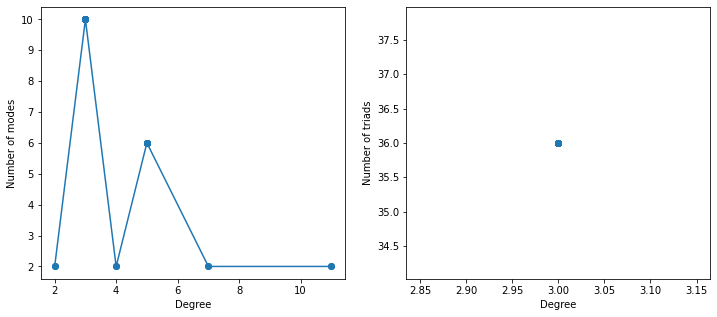

In [60]:
f,g = nwkx.bipartite.sets(G)

fig,ax = plt.subplots(1,2,figsize=(12,5))

mdegs = G.degree(f) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[0].plot(mvals,mhist,'o-')
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of modes')


mdegs = G.degree(g) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[1].plot(mvals,mhist,'o-')
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Number of triads')


plt.show()

In [38]:
fn = dn+"adjacency_nl_6x6.npz"
nl = np.load(fn,allow_pickle=True) 

nx = 5
ny = 5

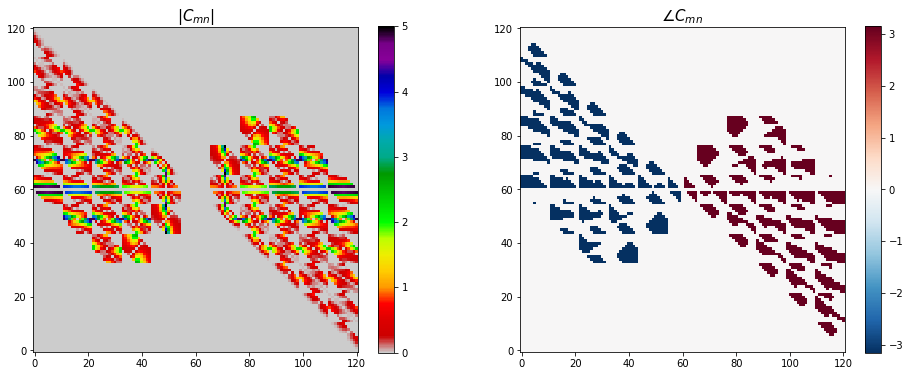

In [39]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

# abs
im = ax[0].imshow(np.abs(nl['C']),cmap="nipy_spectral_r",origin="lower",interpolation="none")

ax[0].set_title(r'$|C_{mn}|$',fontsize=15)
fig.colorbar(im,ax=ax[0])

# angle
im = ax[1].imshow(np.angle(nl['C']),cmap="RdBu_r",origin="lower",interpolation="none")

ax[1].set_title(r'$\angle C_{mn}$',fontsize=15)
fig.colorbar(im,ax=ax[1])

# ax_adj(ax,nx,ny)

plt.show()

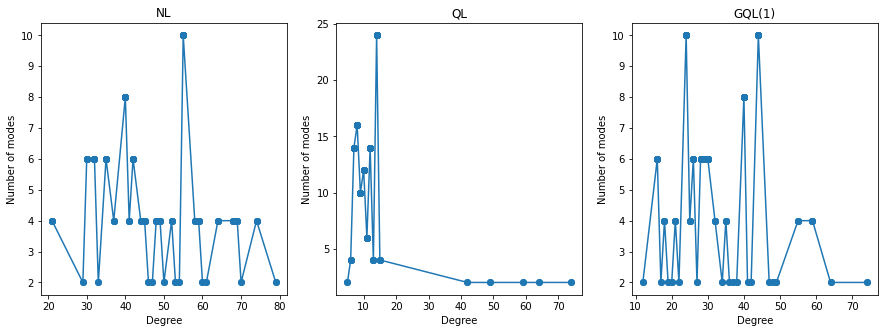

In [40]:
nx = 5
ny = 5

fn = dn+"adjacency_nl_6x6.npz"
nl = np.load(fn,allow_pickle=True) 

fn = dn+"adjacency_ql_6x6.npz"
ql = np.load(fn,allow_pickle=True) 

fn = dn+"adjacency_gql1_6x6.npz"
gql = np.load(fn,allow_pickle=True) 


G_nl = graph(nx,ny,nl['C'])
G_ql = graph(nx,ny,ql['C'])
G_gql = graph(nx,ny,gql['C'])

fig,ax = plt.subplots(1,3,figsize=(15,5))

f_nl,g_nl = nwkx.bipartite.sets(G_nl)
mdegs = G_nl.degree(f_nl) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[0].plot(mvals,mhist,'o-')
ax[0].set_title('NL')

f_ql,g_ql = nwkx.bipartite.sets(G_ql)
mdegs = G_ql.degree(f_ql) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[1].plot(mvals,mhist,'o-')
ax[1].set_title('QL')


f_gql,g_gql = nwkx.bipartite.sets(G_gql)
mdegs = G_gql.degree(f_gql) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[2].plot(mvals,mhist,'o-')
ax[2].set_title('GQL(1)')

for a in ax:
    a.set_xlabel('Degree')
    a.set_ylabel('Number of modes')


plt.show()

In [41]:
fn = dn+"adjacency_gql1_6x6.npz"
gql = np.load(fn,allow_pickle=True) 

nx = 5
ny = 5

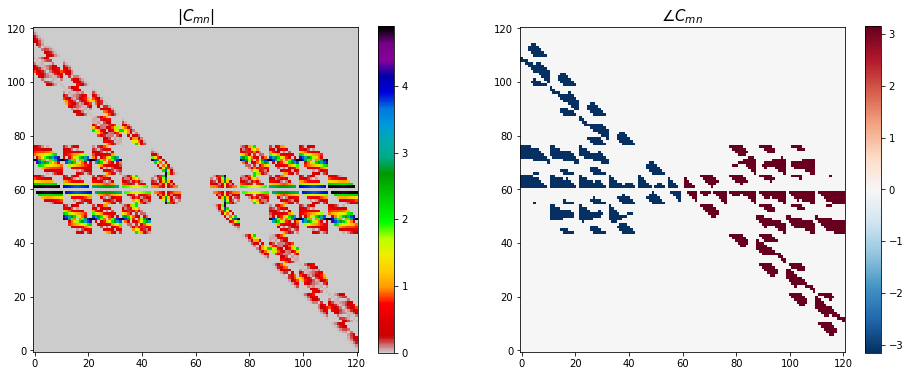

In [42]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

# abs
im = ax[0].imshow(np.abs(gql['C']),cmap="nipy_spectral_r",origin="lower",interpolation="none")

ax[0].set_title(r'$|C_{mn}|$',fontsize=15)
fig.colorbar(im,ax=ax[0])

# angle
im = ax[1].imshow(np.angle(gql['C']),cmap="RdBu_r",origin="lower",interpolation="none")

ax[1].set_title(r'$\angle C_{mn}$',fontsize=15)
fig.colorbar(im,ax=ax[1])

# ax_adj(ax,nx,ny)

plt.show()

In [43]:
A = gql['C'] # test a fully connected graph
G = graph(5,5,A)

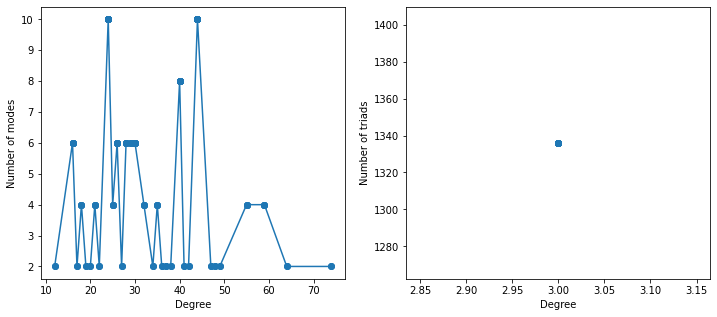

In [44]:
f,g = nwkx.bipartite.sets(G)

fig,ax = plt.subplots(1,2,figsize=(12,5))

mdegs = G.degree(f) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[0].plot(mvals,mhist,'o-')
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of modes')


mdegs = G.degree(g) # dictionary node:degree 
mvals = sorted([d[1] for d in mdegs])
mhist = [mvals.count(x) for x in mvals]
ax[1].plot(mvals,mhist,'o-')
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Number of triads')


plt.show()